#   Case Study on Pre-processing

In [ ]:
          Case study on Pre-processing
Do the following on titanic dataset.
1. Load the dataset into python environment
2. Make ‘PassengerId’ as the index column
3. Check the basic details of the dataset
4. Fill in all the missing values present in all the columns in the dataset
5. Check and handle outliers in at least 3 columns in the dataset
6. Do min max scaling on the feature set (Take ‘Survived’ as target)

In [1]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np

In [46]:
ds = pd.read_csv('titanic_dataset.csv')
ds.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 2. Make ‘PassengerId’ as the index column

In [47]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [48]:
ds.PassengerId.nunique()

891

In [49]:
ds.set_index('PassengerId')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


# 3. Check the basic details of the dataset

In [50]:
ds.shape

(891, 12)

In [51]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [52]:
ds.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
There are 891 rows and 12 columns in the dataset
Age , Cabin and Embarked columns has missing values
Cabin column has 687 missing values out of 8891 rows.So we can drop cabin column

In [53]:
ds.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

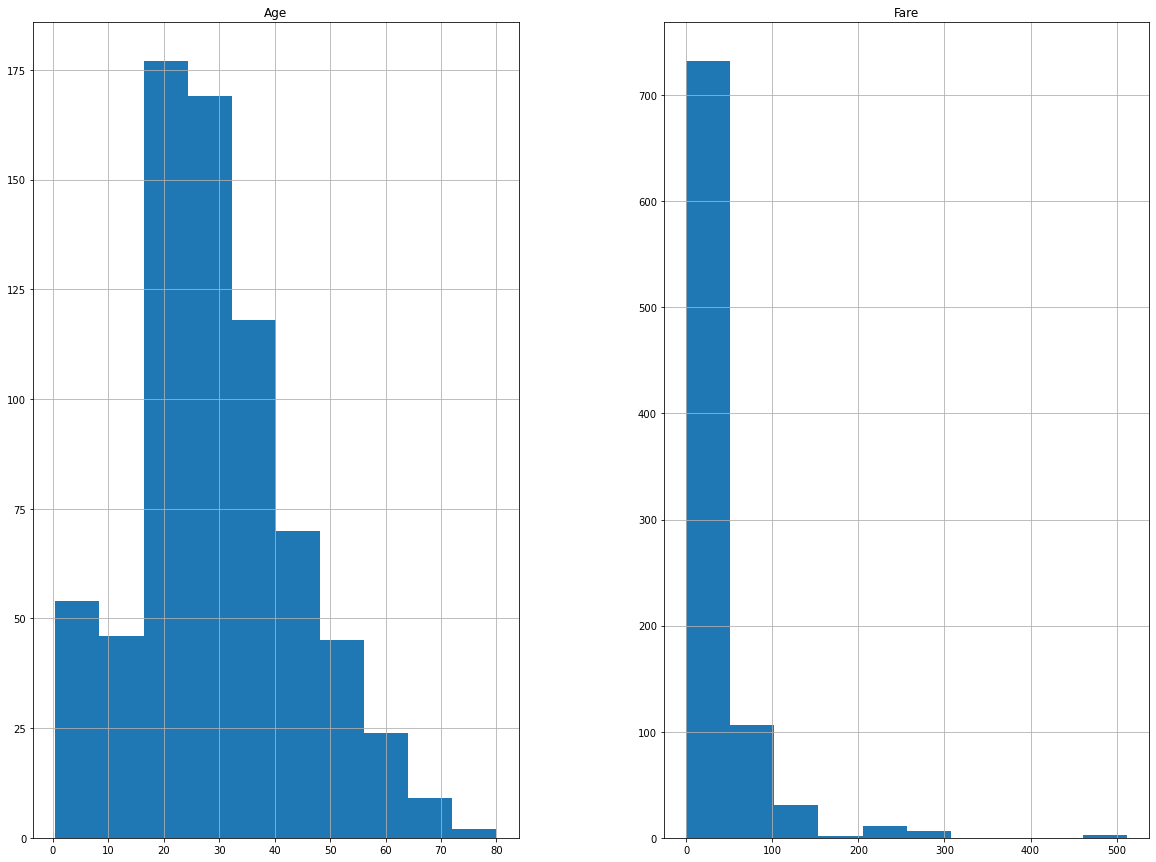

In [54]:
frqraph = ds.select_dtypes(include=['float'])
frqraph.hist(figsize=(20,15))
plt.show()

# 4. Fill in all the missing values present in all the columns in the dataset

# filling the missing values in Age column with median 


In [55]:

ds["Age"] =ds["Age"].fillna(ds["Age"].mean())
ds.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
Cabin column has 687 missing values out of 8891 rows.So we can drop cabin column

In [56]:
ds.drop(['Cabin'],axis = 1,inplace=True)

In [57]:
ds.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [58]:
ds.Embarked.mode()

0    S
dtype: object

# filling the missing values in the 'Embarked' column with the mode

In [59]:
ds["Embarked"] =ds["Embarked"].fillna(ds["Embarked"].mode().iloc[0])
ds.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# 5. Check and handle outliers in at least 3 columns in the dataset

Text(0.5, 1.0, 'Boxplot of Pclass')

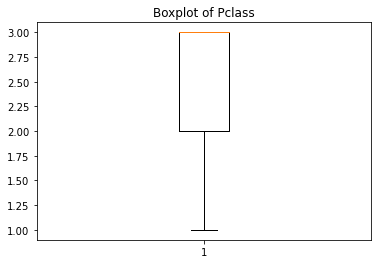

In [60]:
plt.boxplot(ds["Pclass"])
plt.title("Boxplot of Pclass")

Text(0.5, 1.0, 'Boxplot of Age')

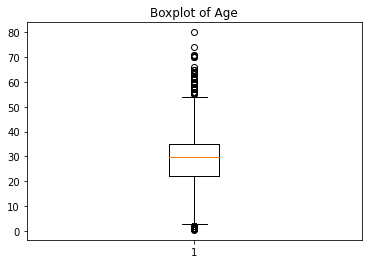

In [61]:
plt.boxplot(ds["Age"])
plt.title("Boxplot of Age")

# checking fare outliers

In [62]:
Q1 = ds['Age'].quantile(0.25)
Q3 = ds['Age'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
Age_outliers = ds[(ds['Age'] < Q1 - whisker_width*IQR) | (ds['Age'] > Q3 + whisker_width*IQR)]
Age_outliers.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.075,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.550,S
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.000,S
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.125,Q
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.500,S


In [ ]:
Since Age can have outliers , not updating the data

Text(0.5, 1.0, 'Boxplot of Fare')

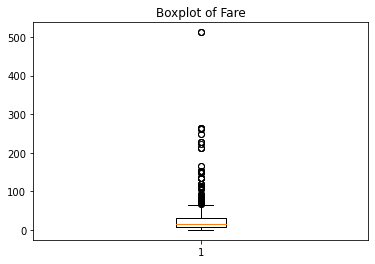

In [63]:
plt.boxplot(ds["Fare"])
plt.title("Boxplot of Fare")

# checking fare outliers

In [64]:
Q1 = ds['Fare'].quantile(0.25)
Q3 = ds['Fare'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
Fare_outliers = ds[(ds['Fare'] < Q1 - whisker_width*IQR) | (ds['Fare'] > Q3 + whisker_width*IQR)]
Fare_outliers.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.000000,3,2,19950,263.0000,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,29.699118,1,0,PC 17569,146.5208,C
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.000000,1,0,PC 17604,82.1708,C
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.000000,1,0,PC 17572,76.7292,C


# updating outliers with lower values an higher values

In [65]:
Q1 = ds['Fare'].quantile(0.25)
Q3 = ds['Fare'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
ds['Fare']=np.where(ds['Fare']>upper_whisker,upper_whisker,np.where(ds['Fare']<lower_whisker,lower_whisker,ds['Fare']))


# Checking outliers after update

In [66]:
Q1 = ds['Fare'].quantile(0.25)
Q3 = ds['Fare'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
Fare_outliers = ds[(ds['Fare'] < Q1 - whisker_width*IQR) | (ds['Fare'] > Q3 + whisker_width*IQR)]
Fare_outliers.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked


# 6. Do min max scaling on the feature set (Take ‘Survived’ as target)

In [67]:
ds.drop(['Name'],axis = 1,inplace=True)
dsa = pd.get_dummies(ds)
dsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Columns: 693 entries, PassengerId to Embarked_S
dtypes: float64(2), int64(5), uint8(686)
memory usage: 645.8 KB


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,female,38.000000,1,0,PC 17599,65.6344,C
2,3,1,3,female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,female,35.000000,1,0,113803,53.1000,S
4,5,0,3,male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,211536,13.0000,S
887,888,1,1,female,19.000000,0,0,112053,30.0000,S
888,889,0,3,female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,male,26.000000,0,0,111369,30.0000,C


In [70]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(dsa)
scaled

array([[0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        1.        ],
       [0.0011236 , 1.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.00224719, 1.        , 1.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.99775281, 0.        , 1.        , ..., 0.        , 0.        ,
        1.        ],
       [0.9988764 , 1.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [1.        , 0.        , 1.        , ..., 0.        , 1.        ,
        0.        ]])

In [71]:
dsa.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Ticket_110152,...,Ticket_W./C. 14263,Ticket_W./C. 6607,Ticket_W./C. 6608,Ticket_W./C. 6609,Ticket_W.E.P. 5734,Ticket_W/C 14208,Ticket_WE/P 5735,Embarked_C,Embarked_Q,Embarked_S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,...,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,24.046813,0.352413,0.647587,0.003367,...,0.001122,0.002245,0.004489,0.001122,0.001122,0.001122,0.002245,0.188552,0.086420,0.725028
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,20.481625,0.477990,0.477990,0.057961,...,0.033501,0.047351,0.066890,0.033501,0.033501,0.033501,0.047351,0.391372,0.281141,0.446751
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,65.634400,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [73]:
y=dsa["Survived"]
x=dsa.drop(["Survived"],axis=1)

In [74]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.25)

In [90]:
from sklearn import linear_model
lr = linear_model.LogisticRegression(max_iter=3000)

In [91]:
model = lr.fit(x_train,y_train)

In [86]:
predictions = model.predict(x_test)

In [78]:
print(y_test)

709    1
439    0
840    0
720    1
39     1
      ..
880    1
425    0
101    0
199    0
424    0
Name: Survived, Length: 223, dtype: int64


In [87]:
print(predictions)

[0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 1 0 0 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 1 1
 0 0 1 1 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 0 1 0 0 0 1 0 0 1 1 1 0 0 1 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 1 1 0 1 0 0 1 1 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1
 0]


In [88]:
from sklearn.metrics import mean_squared_error

In [89]:
print("MSE is ",mean_squared_error(y_test,predictions))

MSE is  0.17937219730941703
